In [2]:
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

file = open("/home/andres/repos/rat-mapping-paper/reports/J_RCML_000/combine.pkl","rb")
combinations = pickle.load(file)

In [3]:
def threshold_array(pos):
    my_dict = {
    (key[0], key[2]): value["a"].mean() for  key,value in combinations.items() if key[1] == pos
    }
    keys, values = zip(*my_dict.items())
    axis0 = np.unique([key[0] for key in keys])
    axis1 = ["Deltoid", "Biceps", "Triceps", "ECR", "FCR", "ADM"][::-1]
    array = np.zeros((len(axis0), len(axis1)))
    for key, value in zip(keys, values):
        array[np.where(axis0 == key[0])[0], np.where(np.array(axis1) == key[1][1:])[0]] = value   
    return(array, axis0, axis1)

In [4]:
def graph_arr(pos):
    arr, subject, muscle = threshold_array(pos)
    sub_mean = np.mean(arr, axis=0)
    row = np.vsplit(arr,len(subject))
    row = [i.tolist() for i in row]
    for xval in row:
        plt.plot(xval[0], muscle, linestyle='dashed', marker=".", markersize=20, alpha =0.3)
        plt.plot(sub_mean,muscle, color = "black", linestyle='dashed', marker=".", markersize=20)
    plt.yticks(weight ='bold',style = 'italic')
    plt.xlabel('Threshold')
    plt.show()

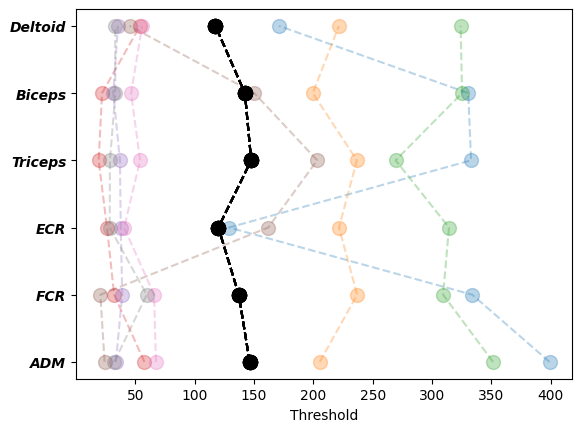

In [5]:
graph_arr("C7M-C7L")

In [6]:
def avgTarray(pos):
    my_dict = {
    (key[0], key[2]): value["a"].mean() for  key,value in combinations.items() if key[1] == pos
    }
    keys, values = zip(*my_dict.items())
    axis0 = np.unique([key[0] for key in keys])
    axis1 = ["Deltoid", "Biceps", "Triceps", "ECR", "FCR", "ADM"][::-1]
    array = np.zeros((len(axis0), len(axis1)))
    avgs = []
    for a in axis0:
        rsum = []
        for k,v in my_dict.items():
            if k[0] == a:
                rsum.append(v)
        avgs.append((a, np.mean(rsum)))
    for key, value in zip(keys, values):
        array[np.where(axis0 == key[0])[0], np.where(np.array(axis1) == key[1][1:])[0]] = value
    for i, k in enumerate(array):
        array[i] = np.divide(k, avgs[i][1])
    return(array,axis0, axis1,avgs)

In [7]:
def graph_avg_arr(pos):
    arr, subject, muscle, avg = avgTarray(pos)
    sub_mean = np.mean(arr, axis=0)
    row = np.vsplit(arr,len(subject))
    row = [i.tolist() for i in row]
    for xval in row:
        plt.plot(xval[0], muscle, linestyle='dashed', marker=".", markersize=20, alpha =0.3)
        plt.plot(sub_mean,muscle, color = "black", linestyle='dashed', marker=".", markersize=20)
    plt.yticks(weight ='bold',style = 'italic')
    plt.xlabel('Threshold')
    plt.show()

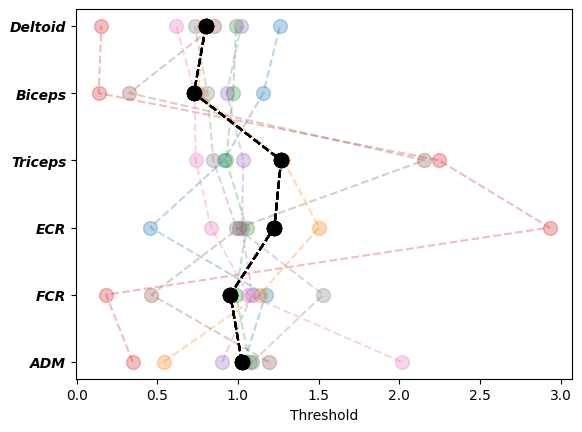

In [8]:
graph_avg_arr("C8M-C8L")

In [17]:
set(k[1] for k in combinations.keys())
positions = []
for pos in combinations.keys():
    if pos[1] in positions: continue
    if (pos[1].split("-")[1][2:] == "") or (pos[1].split("-")[0][2:] == ""):
        positions.append(pos[1])
positions = sorted(positions, key = lambda x: x.split("-")[1][2:])

subjects = []
for poscom in combinations.keys():
    if poscom[1] in positions and poscom[0] not in subjects:
        subjects.append(poscom[0])
subjects.sort()
combo = list(set((s[0], s[1]) for s in combinations.keys() if s[1] in positions))
muscles = set([k[2] for k in combinations.keys()])

a = None
for s in subjects:
    for p in positions:
        for muscle in muscles:
            if (s, p, muscle) in combinations.keys():
                print(s, p, muscle)
                samples = combinations[
                    (s, p, muscle)
                ]["a"]
                samples = samples.reshape(-1, 1).mean(axis=0)
                if a is None: a = samples
                else:
                    a = np.concatenate((a, samples))


# a = a.reshape(4000, len(subjects), -1, len(muscles))
a.shape



amap01 -C6L LBiceps
amap01 -C6L LECR
amap01 -C6L LFCR
amap01 -C6L LADM
amap01 -C6L LDeltoid
amap01 -C6L LTriceps
amap01 -C8L LBiceps
amap01 -C8L LECR
amap01 -C8L LFCR
amap01 -C8L LADM
amap01 -C8L LDeltoid
amap01 -C8L LTriceps
amap01 -C5L LBiceps
amap01 -C5L LECR
amap01 -C5L LFCR
amap01 -C5L LADM
amap01 -C5L LDeltoid
amap01 -C5L LTriceps
amap01 -C7L LBiceps
amap01 -C7L LECR
amap01 -C7L LFCR
amap01 -C7L LADM
amap01 -C7L LDeltoid
amap01 -C7L LTriceps
amap01 -C5M LBiceps
amap01 -C5M LECR
amap01 -C5M LFCR
amap01 -C5M LADM
amap01 -C5M LDeltoid
amap01 -C5M LTriceps
amap01 -C8M LBiceps
amap01 -C8M LECR
amap01 -C8M LFCR
amap01 -C8M LADM
amap01 -C8M LDeltoid
amap01 -C8M LTriceps
amap01 -C7M LBiceps
amap01 -C7M LECR
amap01 -C7M LFCR
amap01 -C7M LADM
amap01 -C7M LDeltoid
amap01 -C7M LTriceps
amap02 -C6L LBiceps
amap02 -C6L LECR
amap02 -C6L LFCR
amap02 -C6L LADM
amap02 -C6L LDeltoid
amap02 -C6L LTriceps
amap02 -C8L LBiceps
amap02 -C8L LECR
amap02 -C8L LFCR
amap02 -C8L LADM
amap02 -C8L LDeltoid
amap

(360,)

In [29]:
for p in positions:
    a = list(set(k[0] for k in combinations.keys() if k[1] == p))
    print(sorted(a))

            

['amap01', 'amap02', 'amap03', 'amap04', 'amap05', 'amap06', 'amap07', 'amap08']
['amap01', 'amap02', 'amap03', 'amap04', 'amap05', 'amap06', 'amap07', 'amap08']
['amap01', 'amap02', 'amap03', 'amap04', 'amap05', 'amap06', 'amap07', 'amap08']
['amap01', 'amap02', 'amap03', 'amap04', 'amap05', 'amap06', 'amap07', 'amap08']
['amap01', 'amap02', 'amap04', 'amap05', 'amap06', 'amap07', 'amap08']
['amap01', 'amap02', 'amap03', 'amap04', 'amap05', 'amap06', 'amap07', 'amap08']
['amap01', 'amap02', 'amap03', 'amap04', 'amap05', 'amap06', 'amap07', 'amap08']
['amap04', 'amap05', 'amap06', 'amap07', 'amap08']


In [11]:
combinations.keys()

dict_keys([('amap01', 'C5M-C5L', 'LADM'), ('amap01', 'C5M-C5L', 'LBiceps'), ('amap01', 'C5M-C5L', 'LDeltoid'), ('amap01', 'C5M-C5L', 'LECR'), ('amap01', 'C5M-C5L', 'LFCR'), ('amap01', 'C5M-C5L', 'LTriceps'), ('amap01', 'C5M-C6L', 'LADM'), ('amap01', 'C5M-C6L', 'LBiceps'), ('amap01', 'C5M-C6L', 'LDeltoid'), ('amap01', 'C5M-C6L', 'LECR'), ('amap01', 'C5M-C6L', 'LFCR'), ('amap01', 'C5M-C6L', 'LTriceps'), ('amap01', 'C7L-C8L', 'LADM'), ('amap01', 'C7L-C8L', 'LBiceps'), ('amap01', 'C7L-C8L', 'LDeltoid'), ('amap01', 'C7L-C8L', 'LECR'), ('amap01', 'C7L-C8L', 'LFCR'), ('amap01', 'C7L-C8L', 'LTriceps'), ('amap01', '-C5M', 'LADM'), ('amap01', '-C5M', 'LBiceps'), ('amap01', '-C5M', 'LDeltoid'), ('amap01', '-C5M', 'LECR'), ('amap01', '-C5M', 'LFCR'), ('amap01', '-C5M', 'LTriceps'), ('amap01', 'C7M-C8L', 'LADM'), ('amap01', 'C7M-C8L', 'LBiceps'), ('amap01', 'C7M-C8L', 'LDeltoid'), ('amap01', 'C7M-C8L', 'LECR'), ('amap01', 'C7M-C8L', 'LFCR'), ('amap01', 'C7M-C8L', 'LTriceps'), ('amap01', 'C8M-C8L', 